In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./diamonds/diamonds.csv')

In [2]:
data.info

<bound method DataFrame.info of        Unnamed: 0  carat        cut color clarity  depth  table   price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0   326.0  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0   326.0  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0   327.0  4.05   
3               4   0.29        NaN   NaN     NaN    NaN    NaN     NaN  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0   335.0  4.34   
...           ...    ...        ...   ...     ...    ...    ...     ...   ...   
53935       53936   0.72      Ideal     D     NaN   60.8   57.0  2757.0  5.75   
53936       53937   0.72       Good     D     NaN   63.1   55.0  2757.0  5.69   
53937       53938   0.70  Very Good     D     NaN   62.8   60.0  2757.0  5.66   
53938       53939   0.86    Premium     H     NaN   61.0   58.0  2757.0  6.15   
53939       53940   0.75      Ideal     D     NaN   62.2   55.0  2757.0  5.83

In [3]:
df = pd.DataFrame(data)

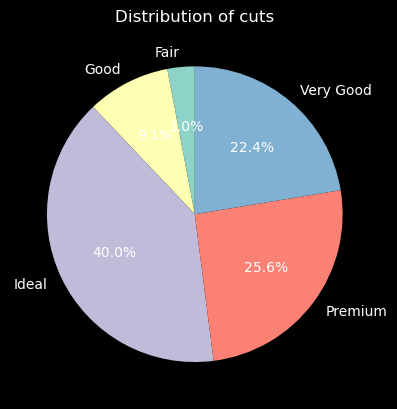

In [4]:
df2 = df.groupby(['cut']).size()

fig, ax = plt.subplots()
ax.pie(df2, labels=df2.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of cuts')

plt.show()

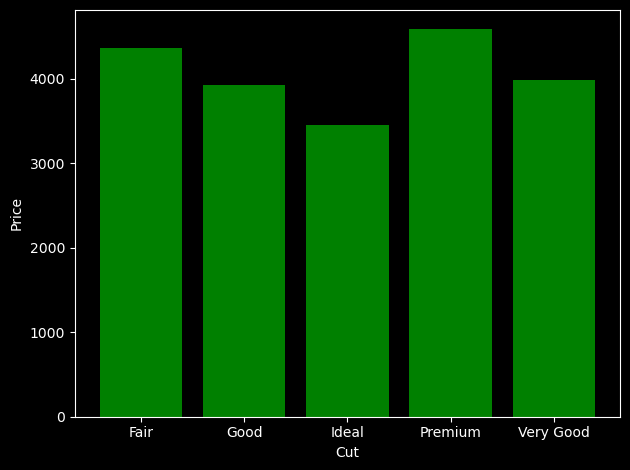

In [5]:
df3 = df.groupby('cut')['price'].mean()

fig, ax = plt.subplots(tight_layout=True)
ax.bar(df3.index, df3, color='green')

ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.set_label('Average price per cut')

plt.show()

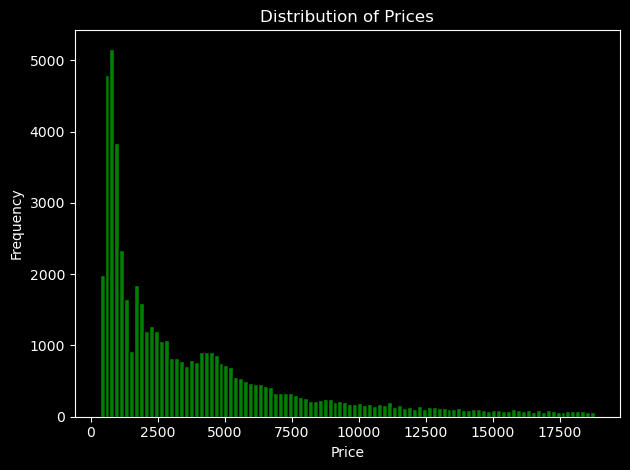

In [6]:
import matplotlib.pyplot as plt

prices = df['price']

fig, ax = plt.subplots(tight_layout=True)
ax.hist(prices, bins=100, color='green', edgecolor='black')

ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Prices')

plt.show()

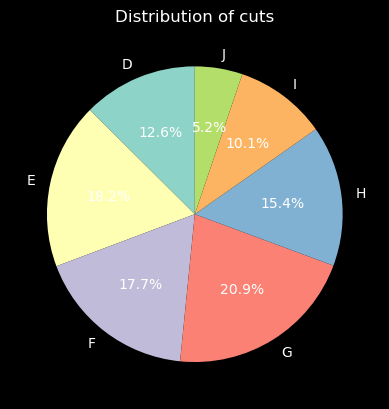

In [7]:
df3 = df.groupby(['color']).size()

fig, ax = plt.subplots()
ax.pie(df3, labels=df3.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of cuts')

plt.show()

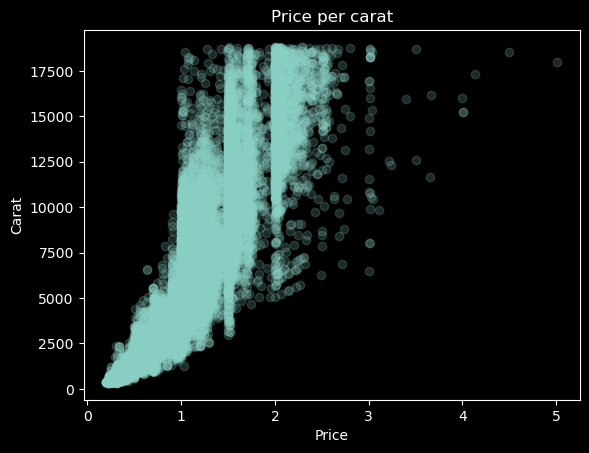

In [8]:
fig, ax = plt.subplots()

ax.scatter(df['carat'], df['price'], marker='o', alpha=0.2)
ax.set_ylabel('Carat')
ax.set_xlabel('Price')

plt.title('Price per carat')

plt.show()

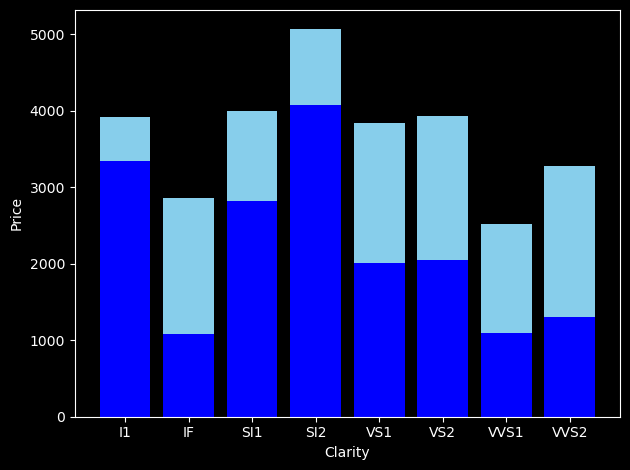

In [9]:
clarity_price_mean = df.groupby('clarity')['price'].mean()
clarity_price_median = df.groupby('clarity')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Clarity')
ax.set_ylabel('Price')
ax.set_label('Average price per clarity')

plt.show()

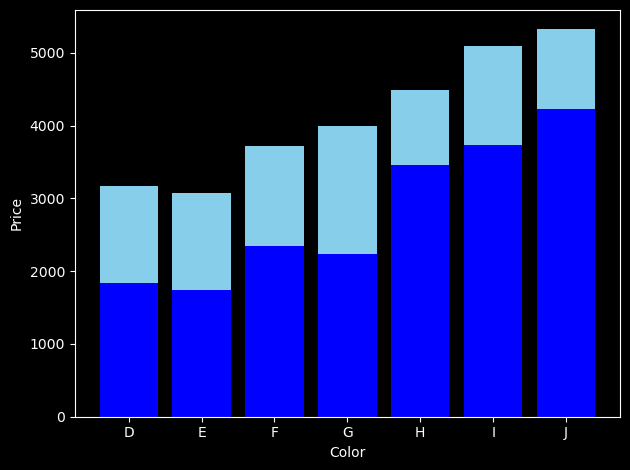

In [10]:
clarity_price_mean = df.groupby('color')['price'].mean()
clarity_price_median = df.groupby('color')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Color')
ax.set_ylabel('Price')
ax.set_label('Average price per color')

plt.show()

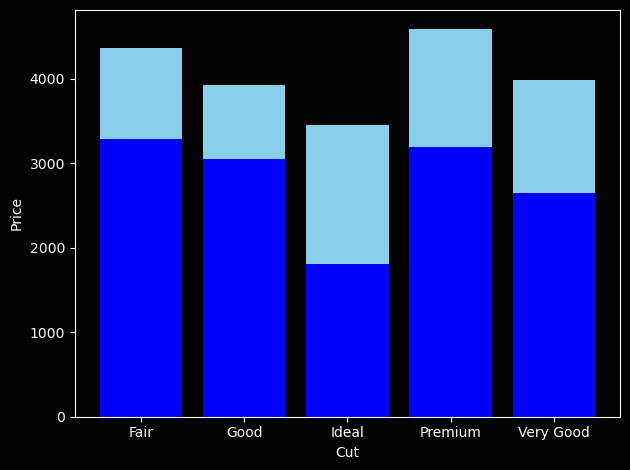

In [11]:
clarity_price_mean = df.groupby('cut')['price'].mean()
clarity_price_median = df.groupby('cut')['price'].median()

fig, ax = plt.subplots(tight_layout=True)

ax.bar(clarity_price_mean.index, clarity_price_mean, color='skyblue')
ax.bar(clarity_price_median.index, clarity_price_median, color='blue')

ax.set_xlabel('Cut')
ax.set_ylabel('Price')
ax.set_label('Average price per cut')

plt.show()

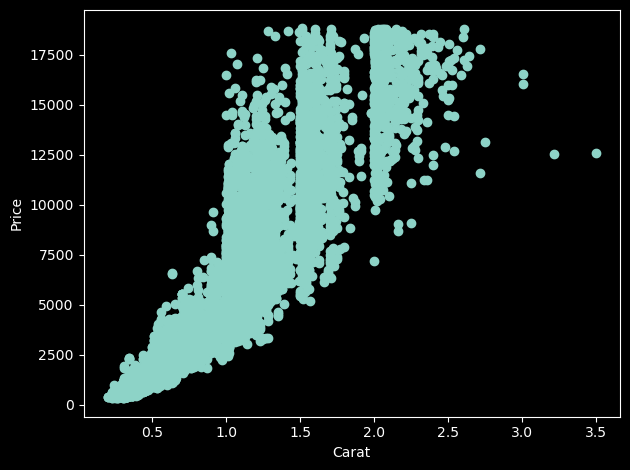

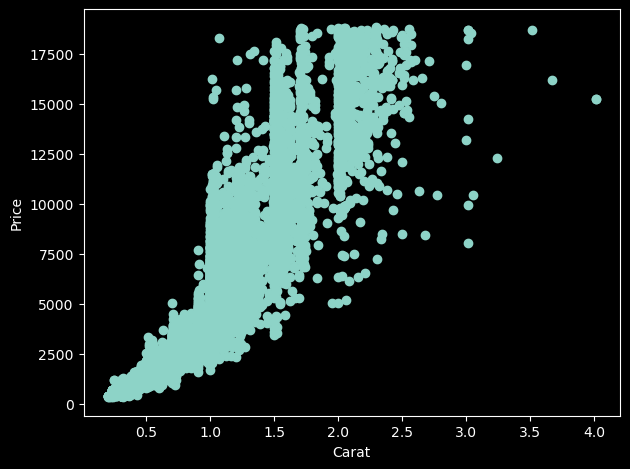

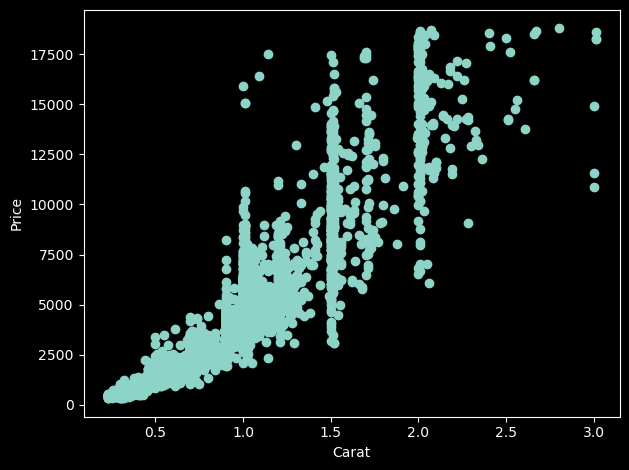

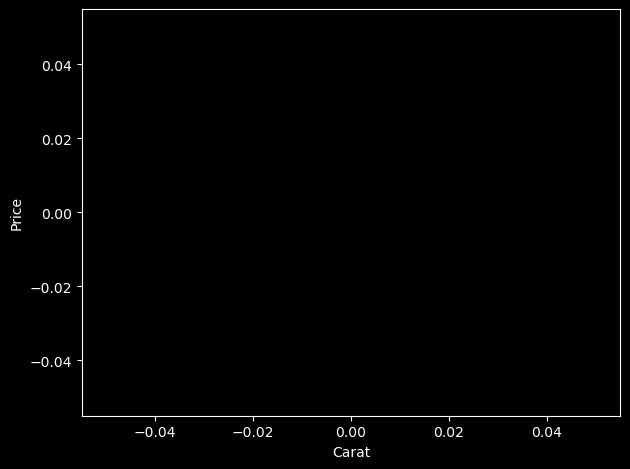

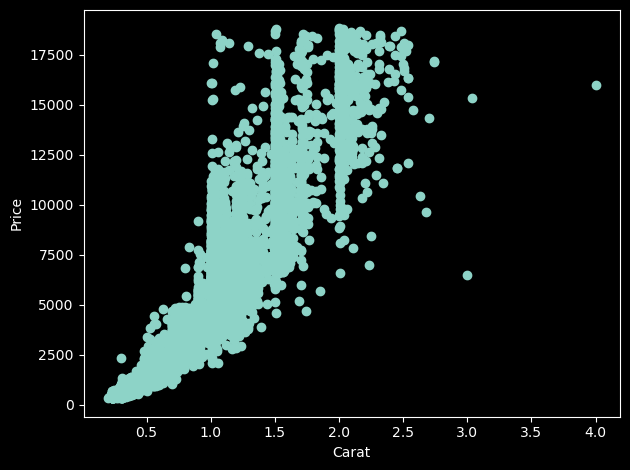

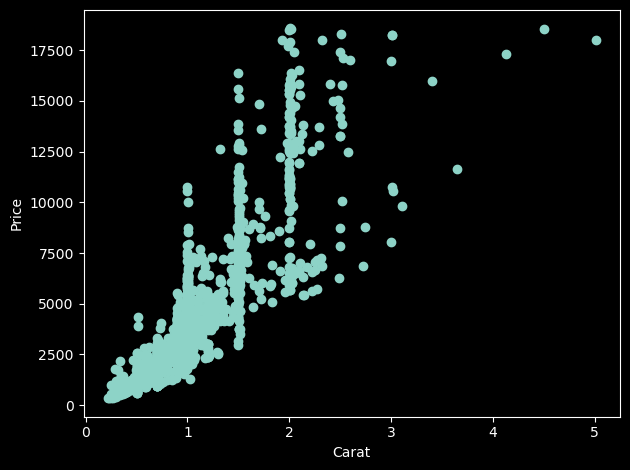

In [12]:
fair_cut_stones = df['cut'].unique()

for cut in fair_cut_stones:
    filtered_df = df[df['cut'] == cut]

    fig, ax = plt.subplots(tight_layout=True)

    ax.scatter(filtered_df['carat'], filtered_df['price'])

    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')
    ax.set_label(f'Price per carat ({cut})')

Text(0.5, 1.0, 'Price distribution by clarity')

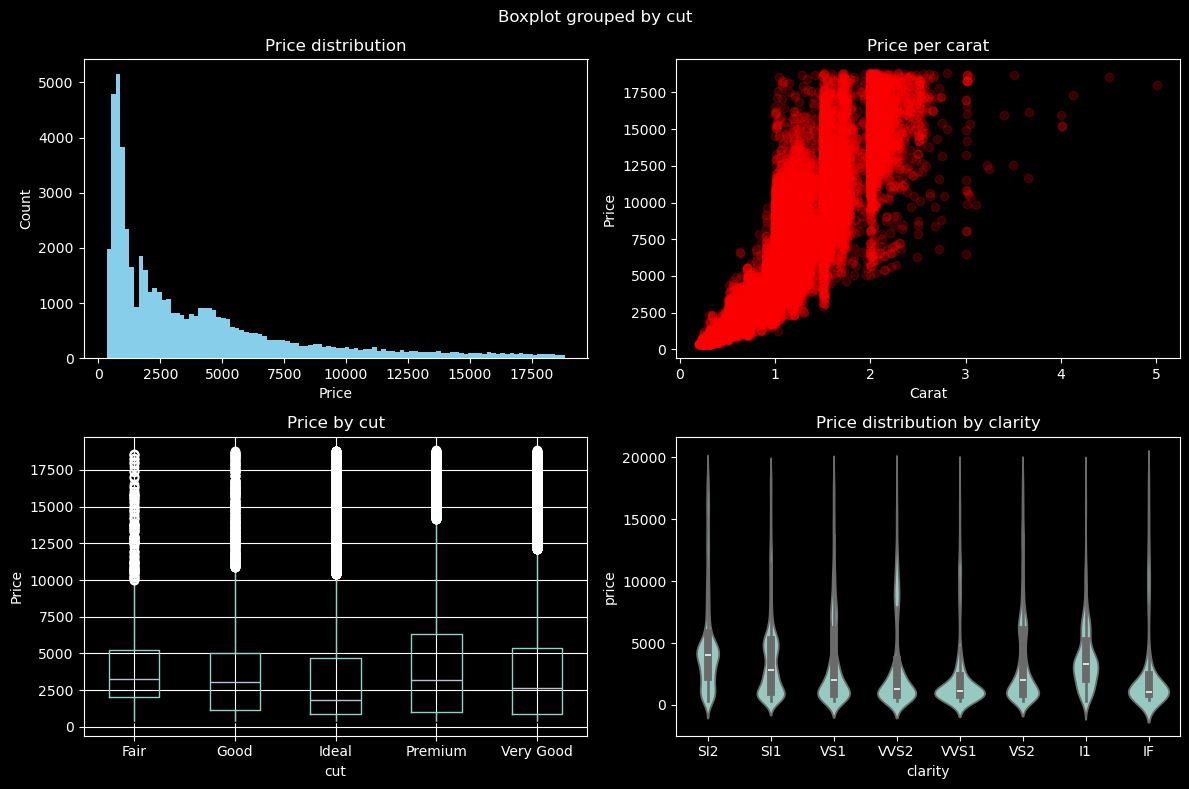

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), tight_layout=True)

# Histogram
axes[0, 0].hist(df['price'], bins=100, color='skyblue')
axes[0, 0].set_title('Price distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Count')

# Scatter
axes[0, 1].scatter(df['carat'], df['price'], marker='o', alpha=0.2, color='red')
axes[0, 1].set_title('Price per carat')
axes[0, 1].set_ylabel('Price')
axes[0, 1].set_xlabel('Carat')

# Box plot of price but cut type
df.boxplot(column='price', by='cut', ax=axes[1, 0])
axes[1, 0].set_title('Price by cut')
axes[1, 0].set_ylabel('Price')

# Advanced visualizationx
sns.violinplot(x='clarity', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price distribution by clarity')


           Average Price  Average Carat  Median Price  Median Carat
cut                                                                
Fair         4360.631219       1.046137        3283.5      1.046137
Good         3929.596330       0.849185        3051.0      0.849185
Ideal        3457.400121       0.702965        1809.0      0.702965
Premium      4584.825718       0.892070        3188.5      0.892070
Very Good    3981.779406       0.806421        2647.0      0.806421


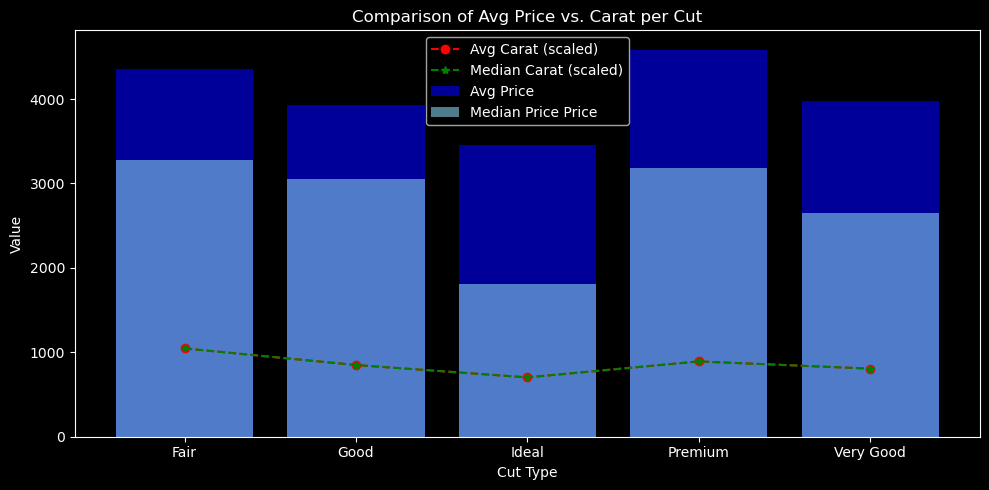

In [14]:
avg_price_per_cut = df.groupby('cut')['price'].mean()
median_price_per_cut = df.groupby('cut')['price'].median()

avg_carat_per_cut = df.groupby('cut')['carat'].mean()
median_carat_per_cut = df.groupby('cut')['carat'].mean()


cut_df = pd.DataFrame({'Average Price': avg_price_per_cut, 'Average Carat': avg_carat_per_cut, 'Median Price': median_price_per_cut, 'Median Carat': median_carat_per_cut})

print(cut_df)

fig, ax = plt.subplots(tight_layout=True, figsize=(10, 5))

ax.bar(cut_df.index, cut_df['Average Price'], color='blue', alpha=0.6, label='Avg Price')
ax.bar(cut_df.index, cut_df['Median Price'], color='skyblue', alpha=0.6, label='Median Price Price')


ax.plot(cut_df.index, cut_df['Average Carat'] * 1000, color='red', marker='o', linestyle='--', label='Avg Carat (scaled)')
ax.plot(cut_df.index, cut_df['Median Carat'] * 1000, color='green', marker='*', linestyle='--', label='Median Carat (scaled)')


ax.set_xlabel('Cut Type')
ax.set_ylabel('Value')
ax.set_title('Comparison of Avg Price vs. Carat per Cut')

ax.legend()

plt.show()

       Average Price  Median Price  Average Carat  Median Carat
color                                                          
D        3169.869058        1836.5       0.657819      0.657819
E        3076.976006        1738.5       0.657886      0.657886
F        3725.327147        2343.0       0.736706      0.736706
G        3999.455802        2242.0       0.771184      0.771184
H        4486.876792        3463.0       0.912276      0.912276
I        5092.752629        3730.0       1.027083      1.027083
J        5324.749465        4234.0       1.162191      1.162191


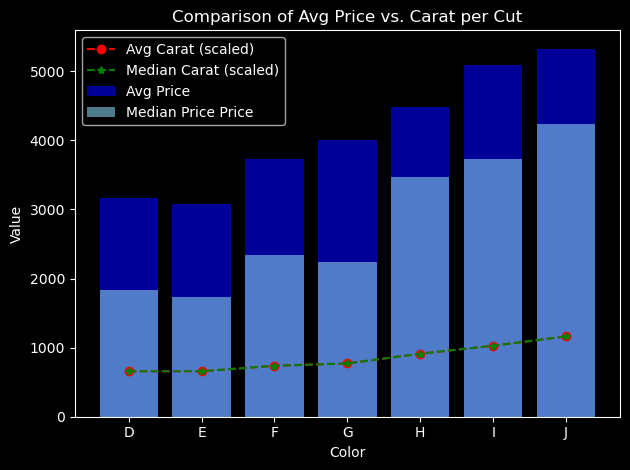

In [15]:
avg_price_per_color = df.groupby('color')['price'].mean()
median_price_per_color = df.groupby('color')['price'].median()

avg_carat_per_color = df.groupby('color')['carat'].mean()
median_carat_per_color = df.groupby('color')['carat'].mean()


color_df = pd.DataFrame({'Average Price': avg_price_per_color, 'Median Price': median_price_per_color, 'Average Carat': avg_carat_per_color, 'Median Carat': median_carat_per_color})
print(color_df)

fig, ax = plt.subplots(tight_layout=True)

ax.bar(color_df.index, color_df['Average Price'], color='blue', alpha=0.6, label='Avg Price')
ax.bar(color_df.index, color_df['Median Price'], color='skyblue', alpha=0.6, label='Median Price Price')


ax.plot(color_df.index, color_df['Average Carat'] * 1000, color='red', marker='o', linestyle='--', label='Avg Carat (scaled)')
ax.plot(color_df.index, color_df['Median Carat'] * 1000, color='green', marker='*', linestyle='--', label='Median Carat (scaled)')


ax.set_xlabel('Color')
ax.set_ylabel('Value')
ax.set_title('Comparison of Avg Price vs. Carat per Cut')

ax.legend()

plt.show()


            Unnamed: 0     carat     depth     table     price         x  \
Unnamed: 0    1.000000 -0.378099 -0.034760 -0.100822 -0.307050 -0.405583   
carat        -0.378099  1.000000  0.028211  0.181546  0.921604  0.975097   
depth        -0.034760  0.028211  1.000000 -0.295681 -0.010575 -0.025272   
table        -0.100822  0.181546 -0.295681  1.000000  0.127126  0.195420   
price        -0.307050  0.921604 -0.010575  0.127126  1.000000  0.884454   
x            -0.405583  0.975097 -0.025272  0.195420  0.884454  1.000000   
y            -0.395978  0.951716 -0.029292  0.183835  0.865433  0.974698   
z            -0.399353  0.953382  0.094964  0.151005  0.861272  0.970769   

                   y         z  
Unnamed: 0 -0.395978 -0.399353  
carat       0.951716  0.953382  
depth      -0.029292  0.094964  
table       0.183835  0.151005  
price       0.865433  0.861272  
x           0.974698  0.970769  
y           1.000000  0.952001  
z           0.952001  1.000000  


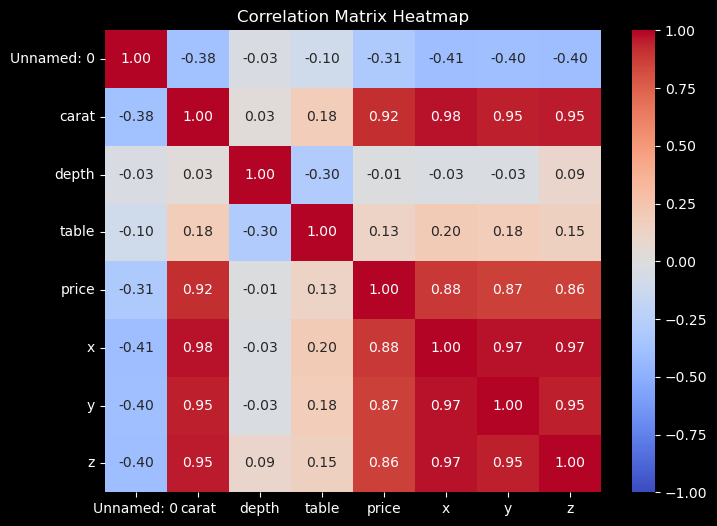

In [16]:

numeric_cols = df.select_dtypes(include=['number'])

correlation_matrix = numeric_cols.corr()
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


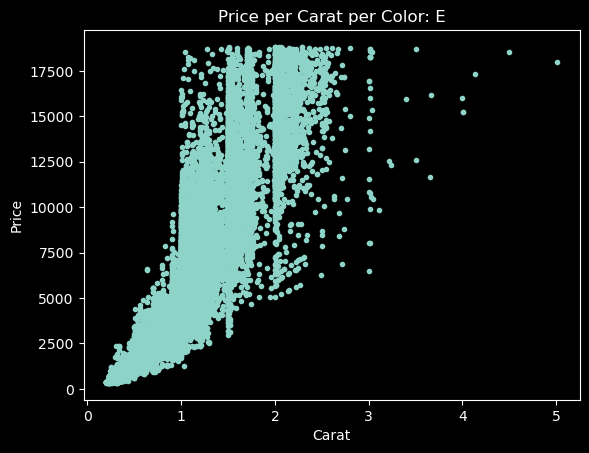

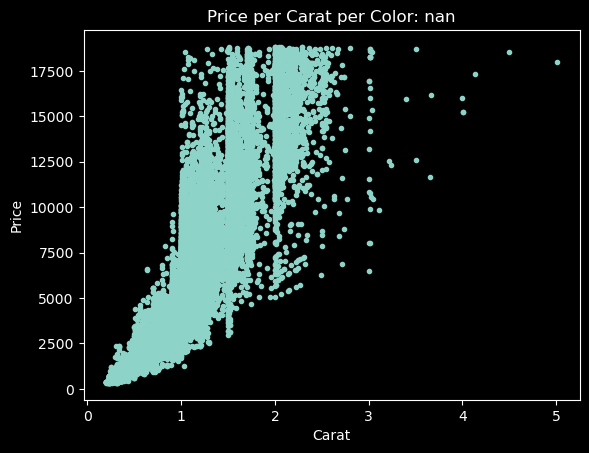

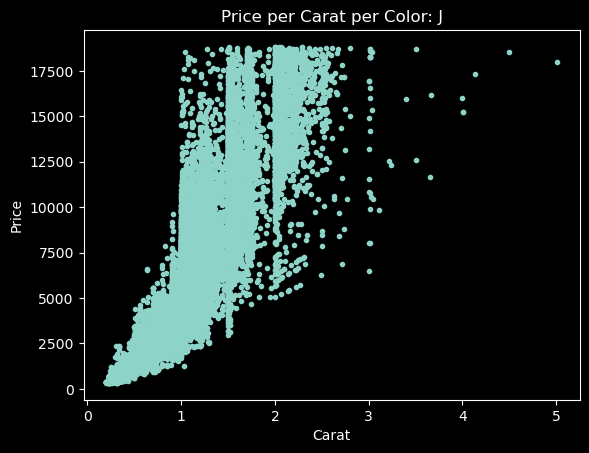

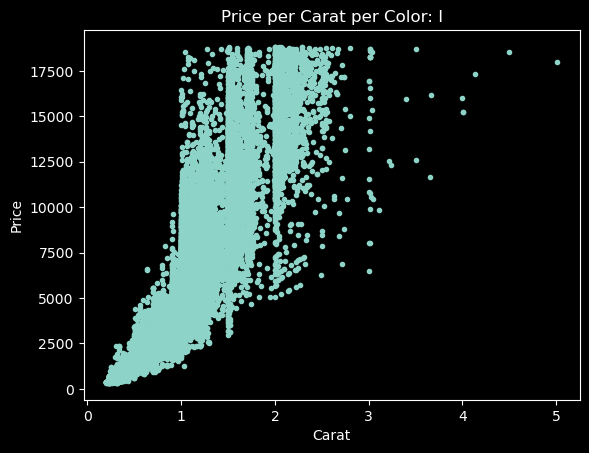

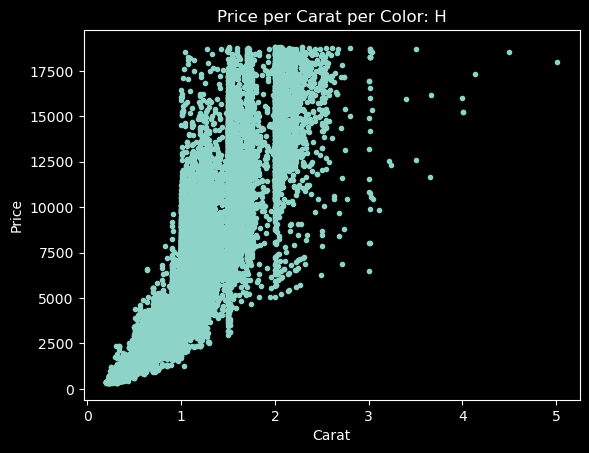

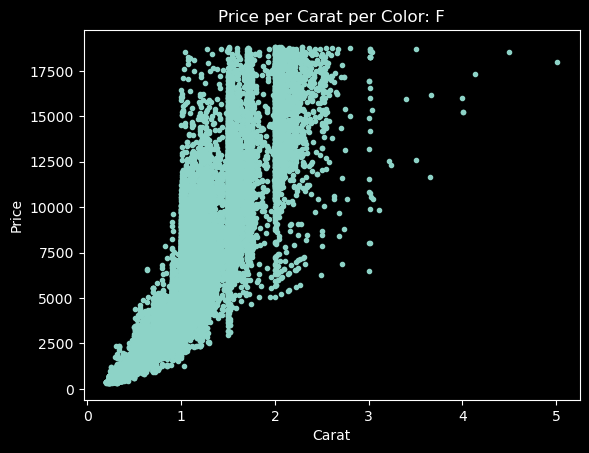

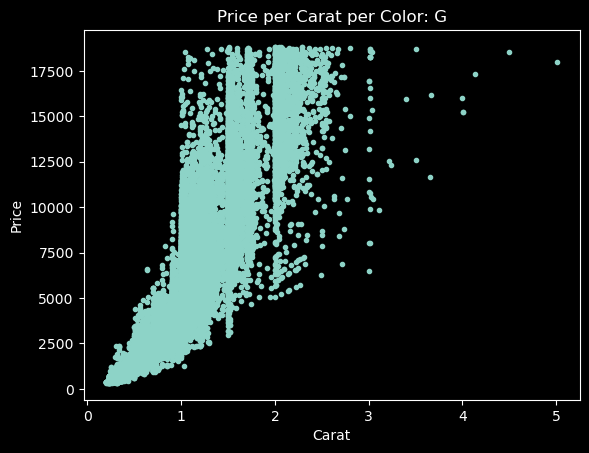

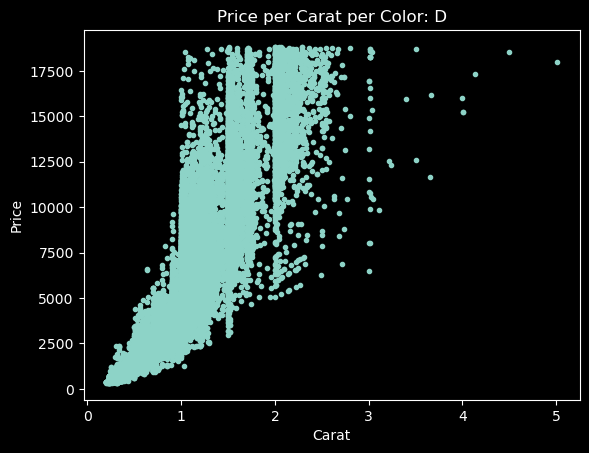

In [26]:
colours = df['color'].unique()

for color in colours:
    filtered_df = df[df['color'] == color]
    fig, ax = plt.subplots()
    plt.scatter(df['carat'], df['price'], marker='.')
    ax.set_title(f'Price per Carat per Color: {color}')
    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')
    plt.show()

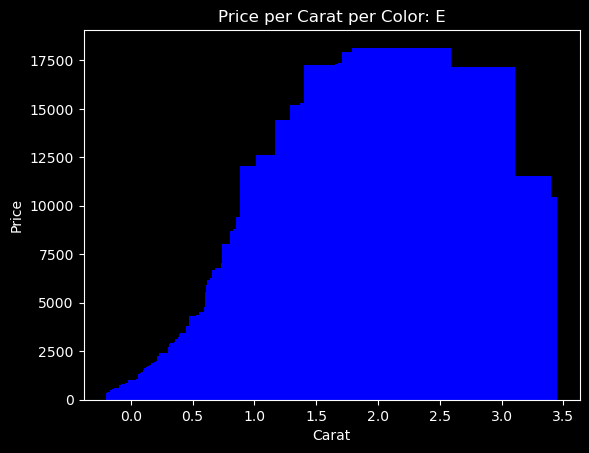

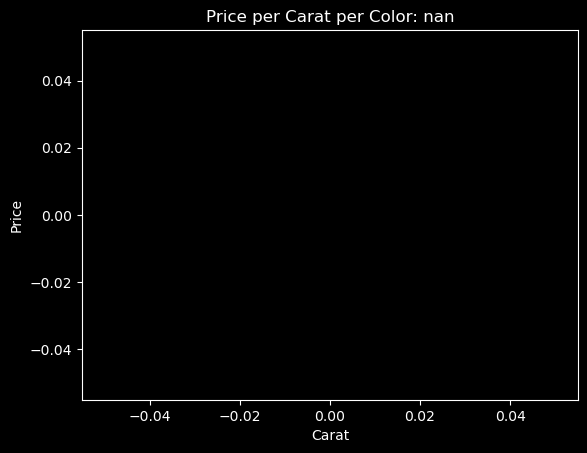

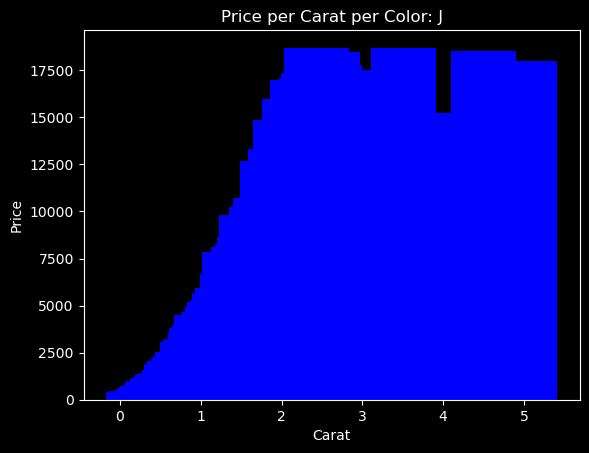

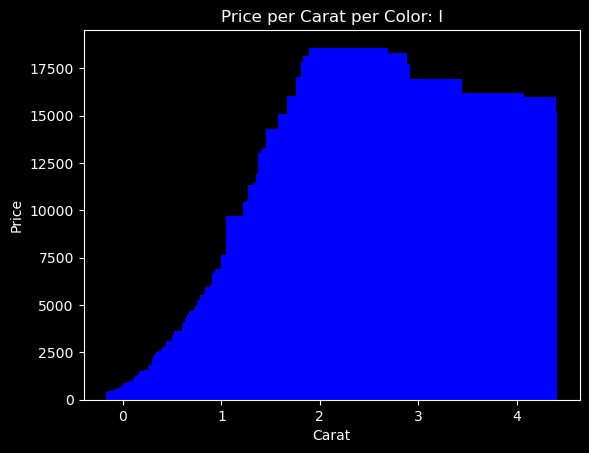

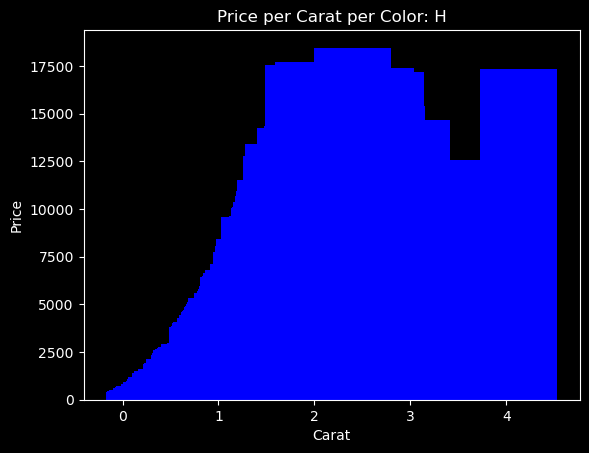

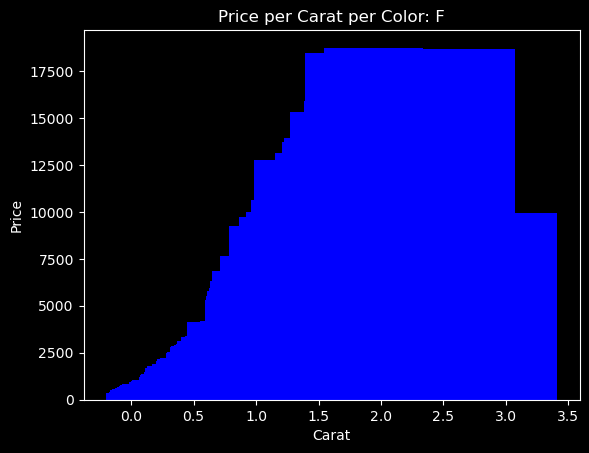

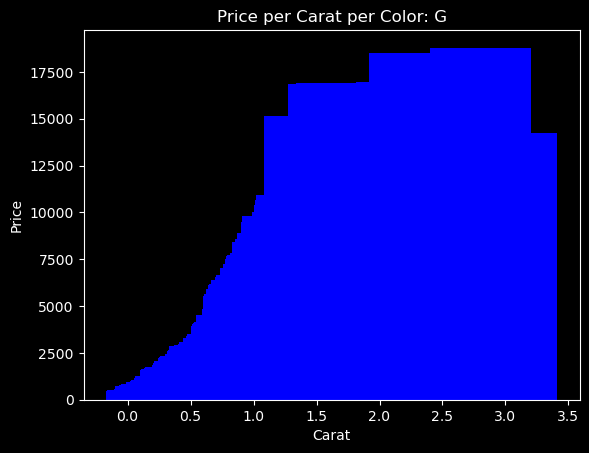

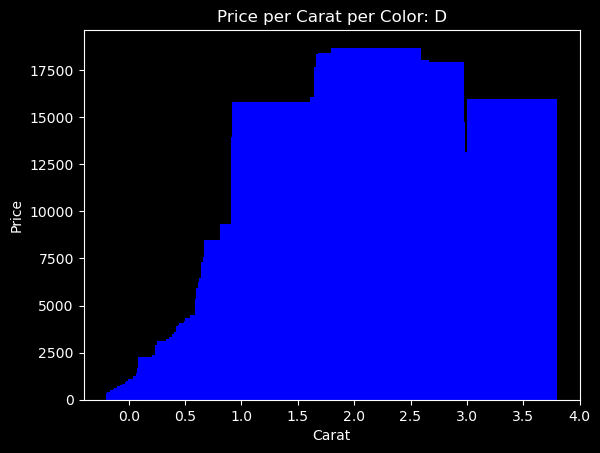

In [41]:
colours = df['color'].unique()

for color in colours:
    filtered_df = df[df['color'] == color]
    avg_price_per_carat = filtered_df.groupby('carat')['price'].mean()

    fig, ax = plt.subplots()
    plt.bar(avg_price_per_carat.index, avg_price_per_carat, color='blue')
    ax.set_title(f'Price per Carat per Color: {color}')
    ax.set_xlabel('Carat')
    ax.set_ylabel('Price')